In [1]:
from hossam import load_data, visualize_silhouette
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np


from scipy.spatial import ConvexHull
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from kneed import KneeLocator


my_dpi=200

📦 아이티윌 이광호 강사가 제작한 라이브러리를 사용중입니다.
📚 자세한 사용 방법은 https://py.hossam.kr 을 참고하세요.
📧 Email: leekh4232@gmail.com
🎬 Youtube: https://www.youtube.com/@hossam-codingclub
📝 Blog: https://blog.hossam.kr/
🔖 Version: 0.4.16

⚠️  'hossam' 패키지의 최신 버전이 출시되었습니다! (설치된 버전: 0.4.16, 최신 버전: 0.4.18)
   최신 버전으로 업데이트하려면 다음 명령어를 실행하세요:
   pip install --upgrade hossam



Warning: hossam 패키지가 최신 버전이 아닙니다.

In [ ]:
origin = load_data("iris")
origin.head()

1936년 영국의 통계학자 로널드 피셔(Ronald A. Fisher)가 소개한 3가지 품종(setosa, versicolor, virginica)의 붓꽃(Iris)에 대한 꽃받침과 꽃잎의 길이와 너비 측정값으로 구성된 유명한 머신러닝 및 데이터 분석용 데이터셋.(출처: Kaggle)

field         description
------------  -------------
Sepal.Length  꽃밭침 길이
Sepal.Width   꽃밭침 너비
Petal.Length  꽃잎 길이
Petal.Width   꽃잎 너비
Species       품종



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df = origin.drop("Species", axis=1)

scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(df), columns=df.columns)
sdf.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


,k,score
0,3,0.446689
1,4,0.400636
2,5,0.330587
4,7,0.316970
7,10,0.316112
3,6,0.314855
6,9,0.311434
5,8,0.310947


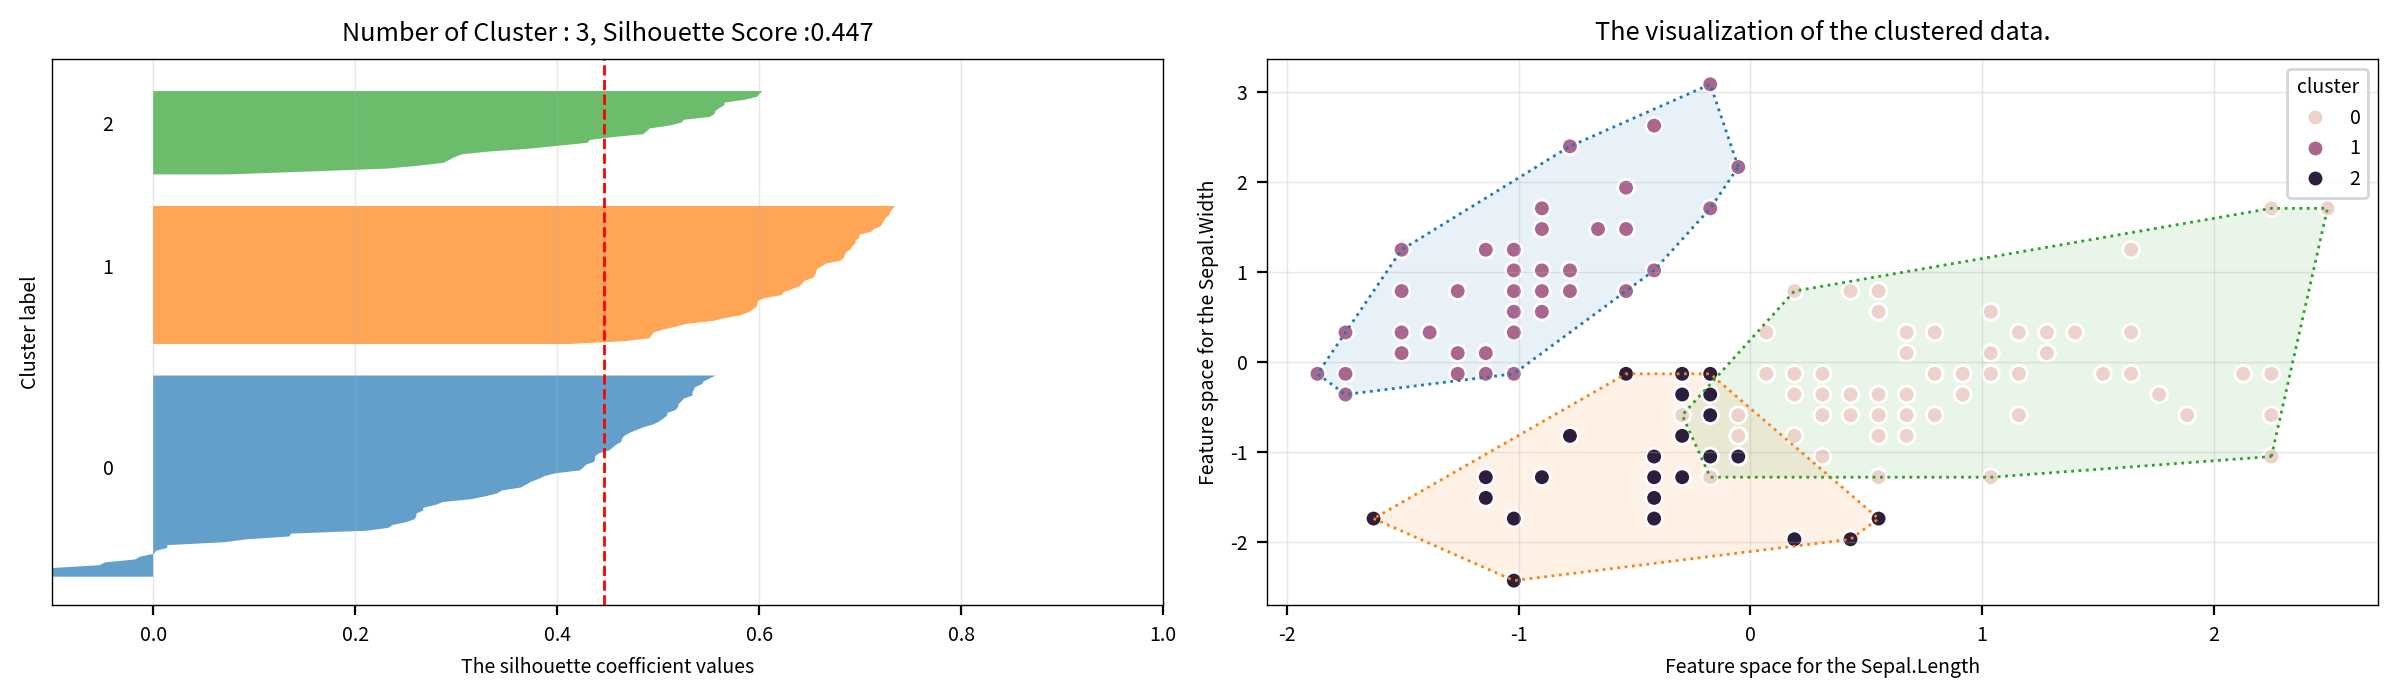

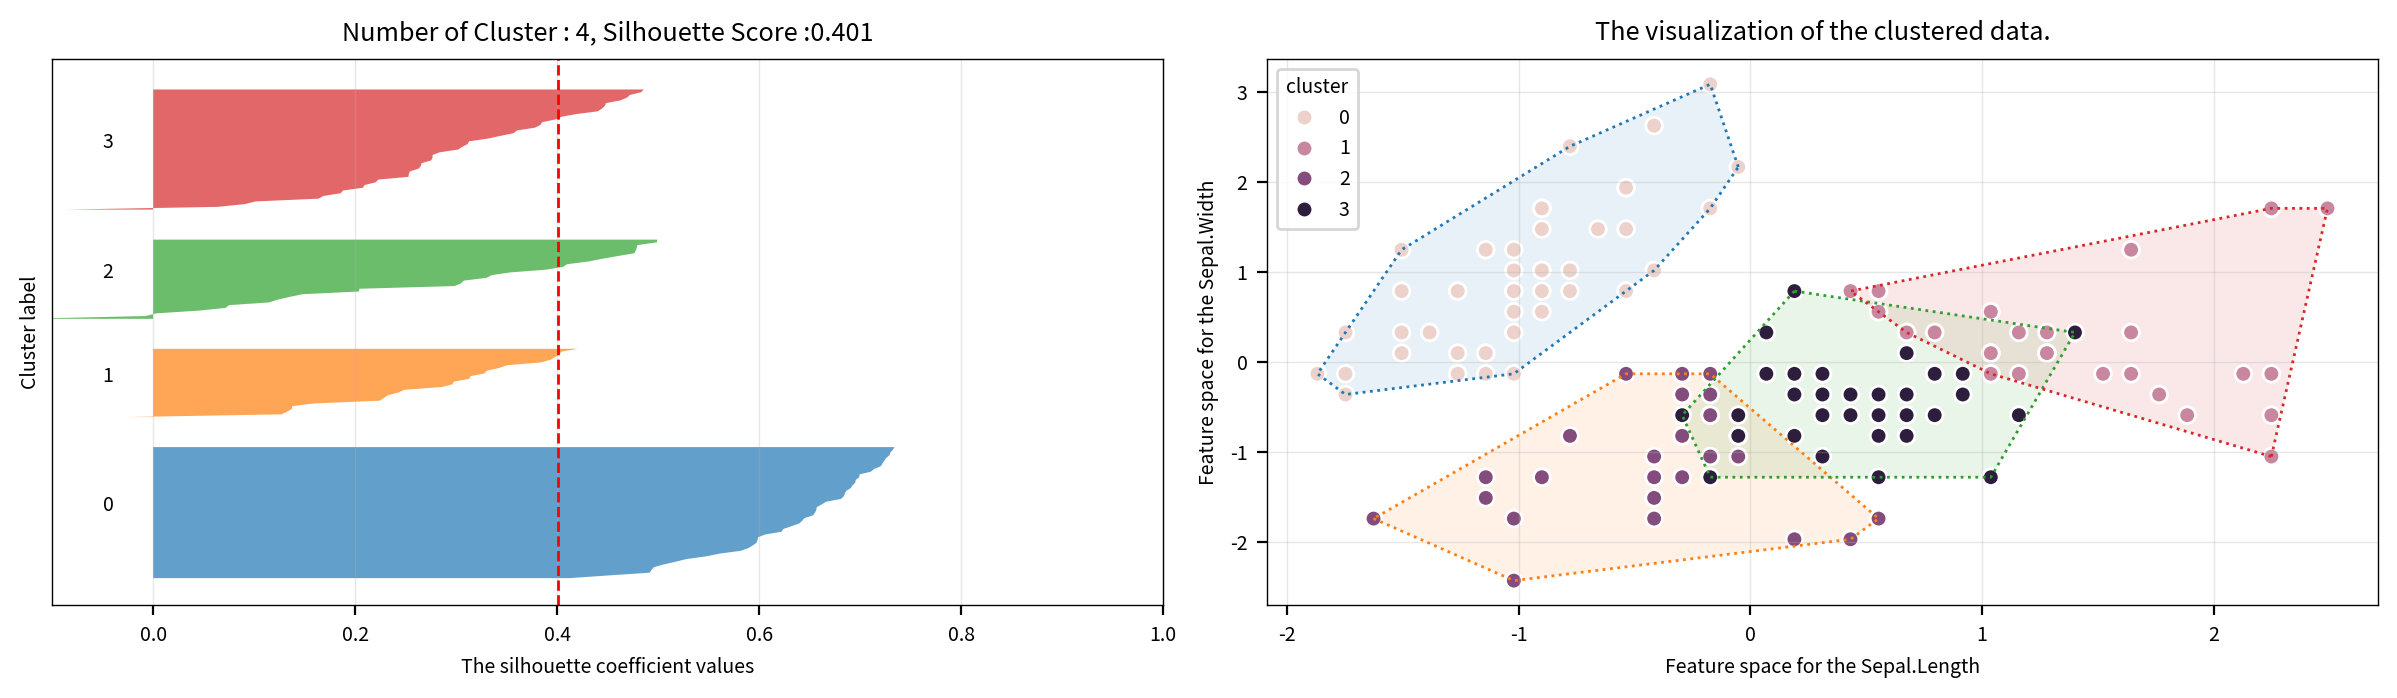

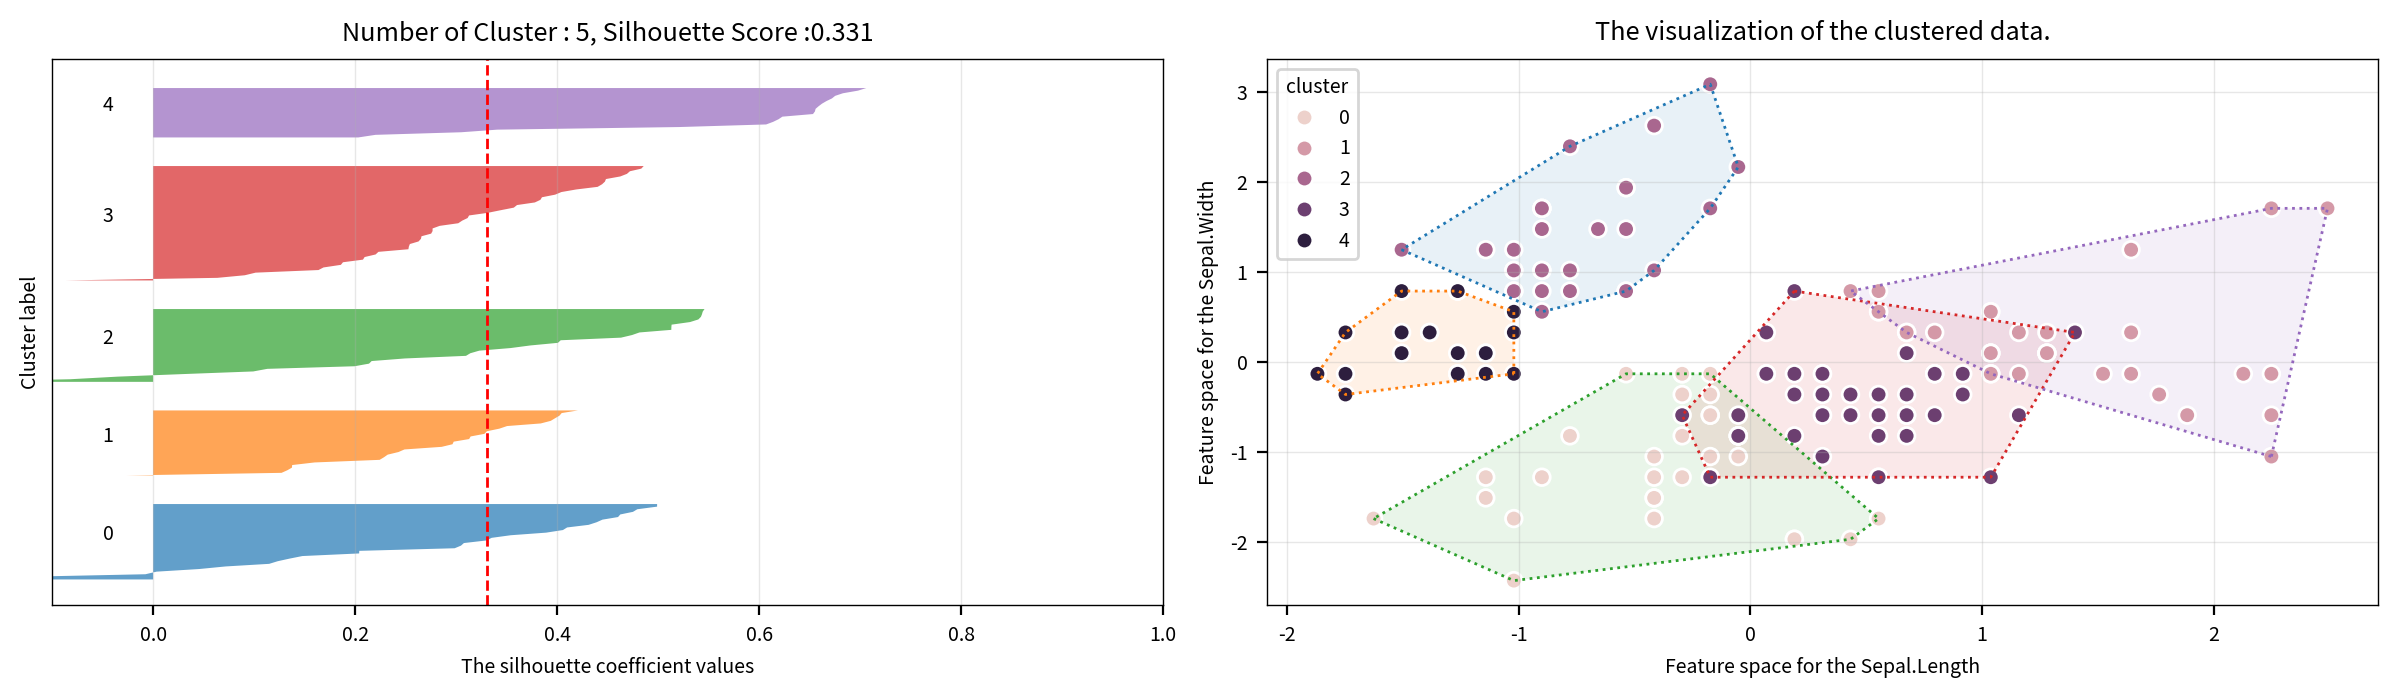

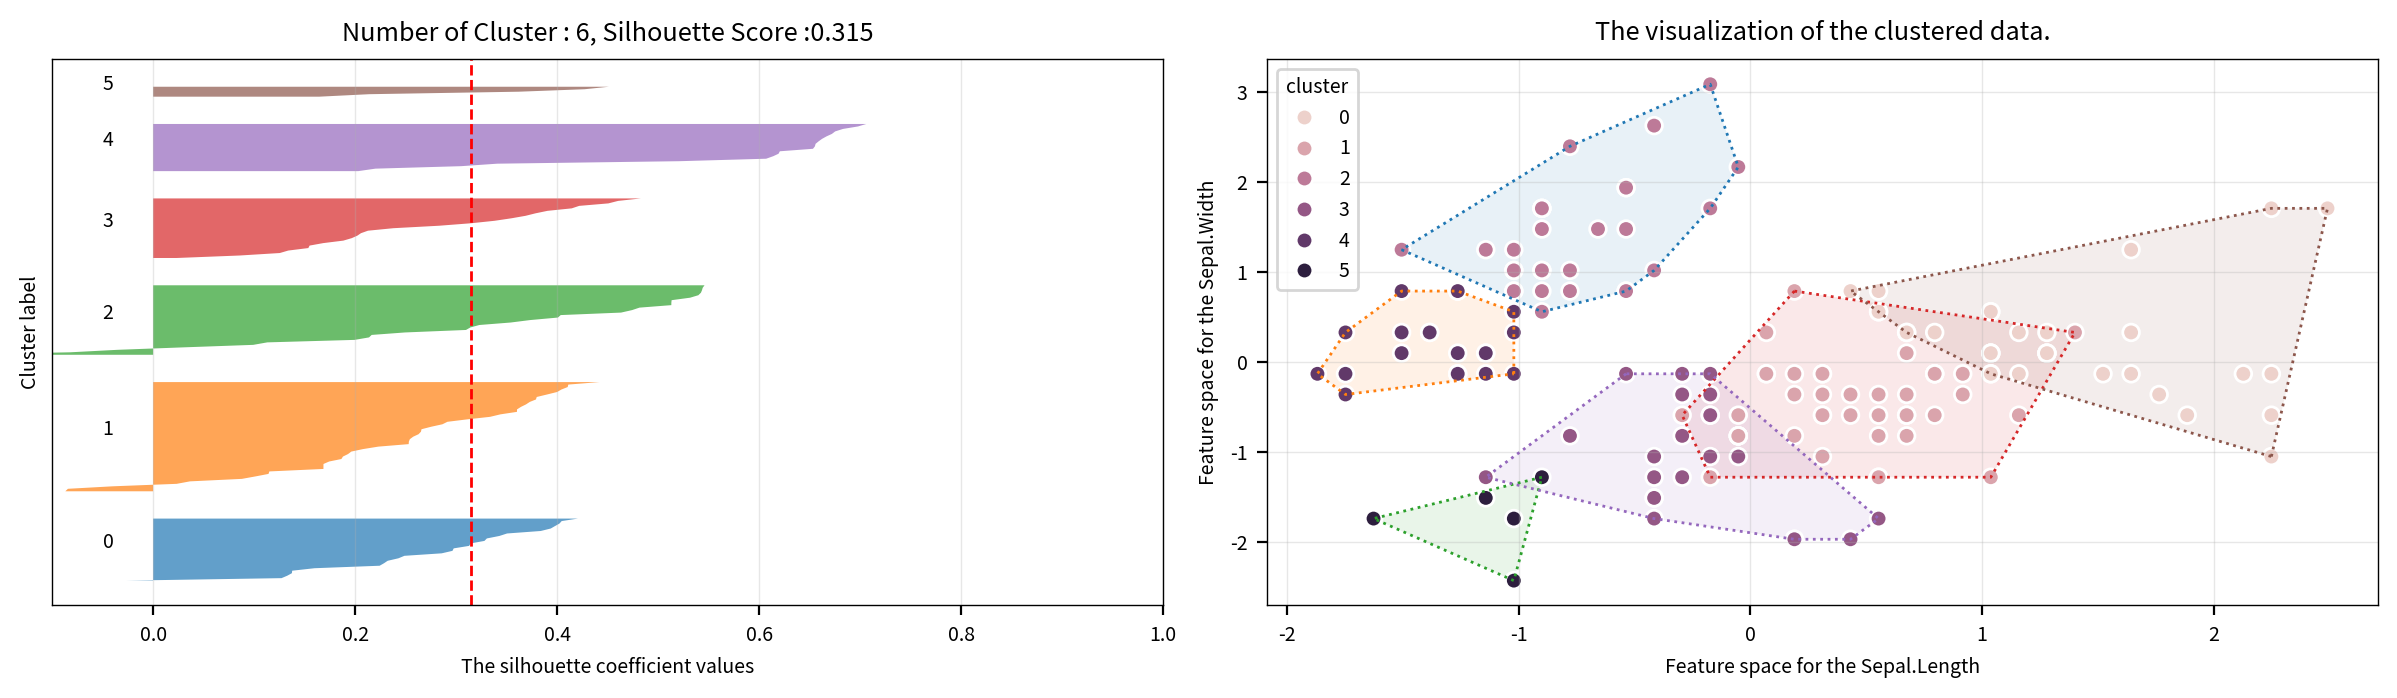

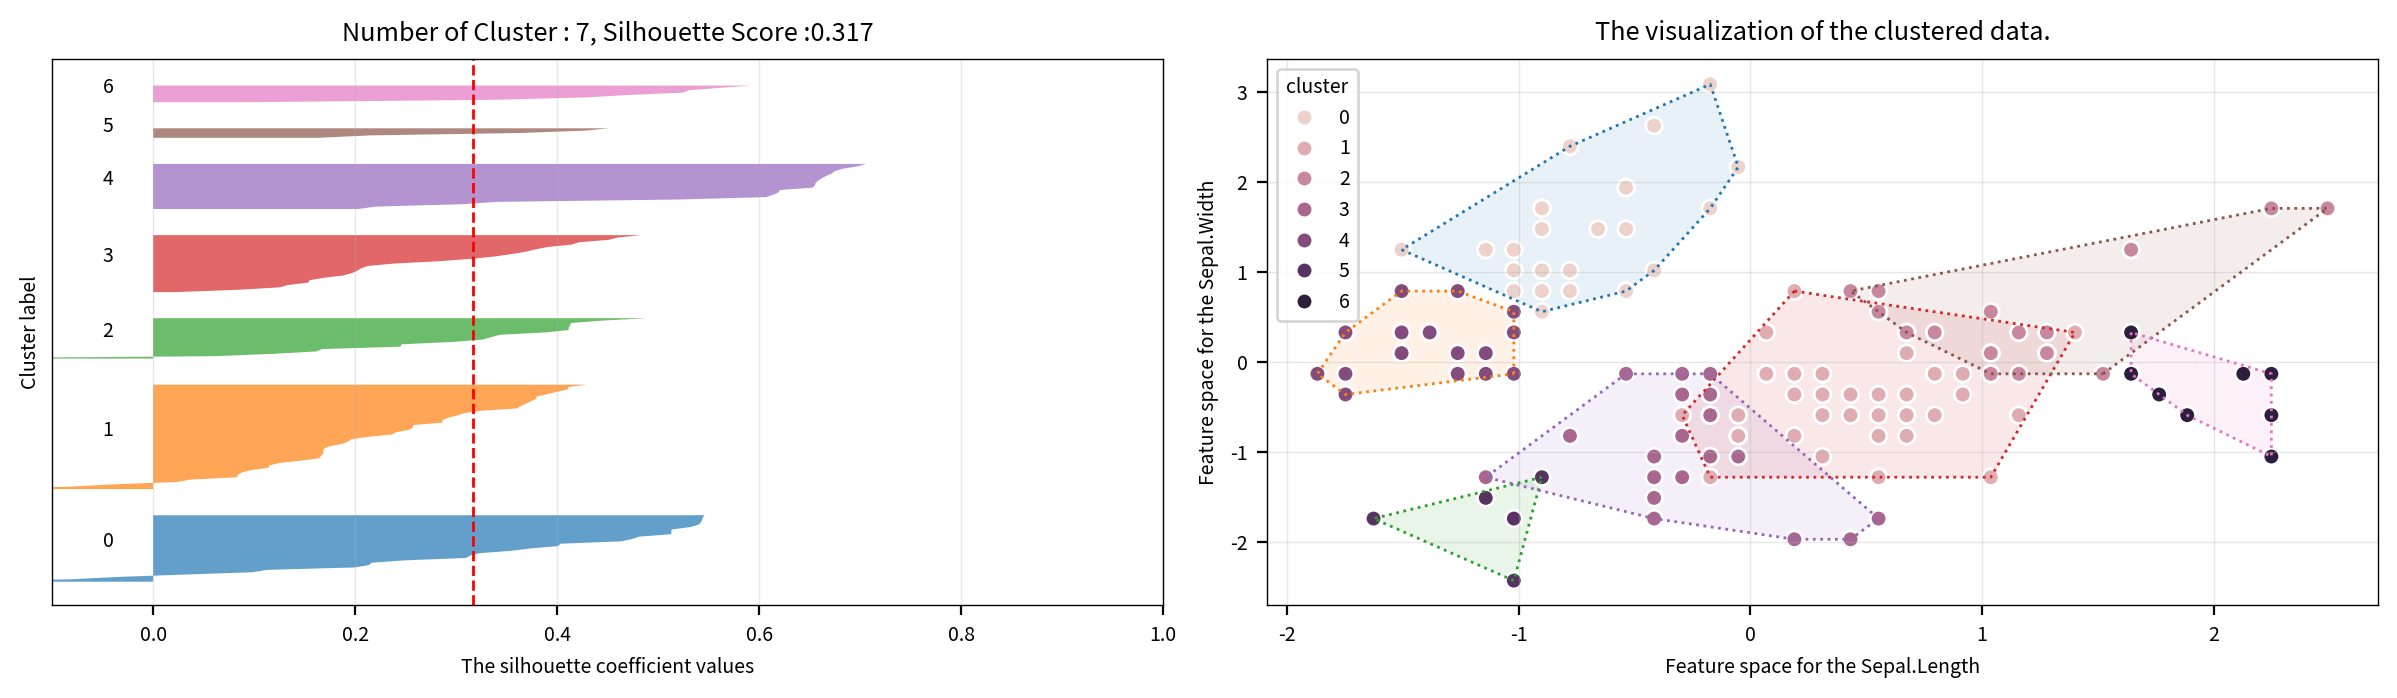

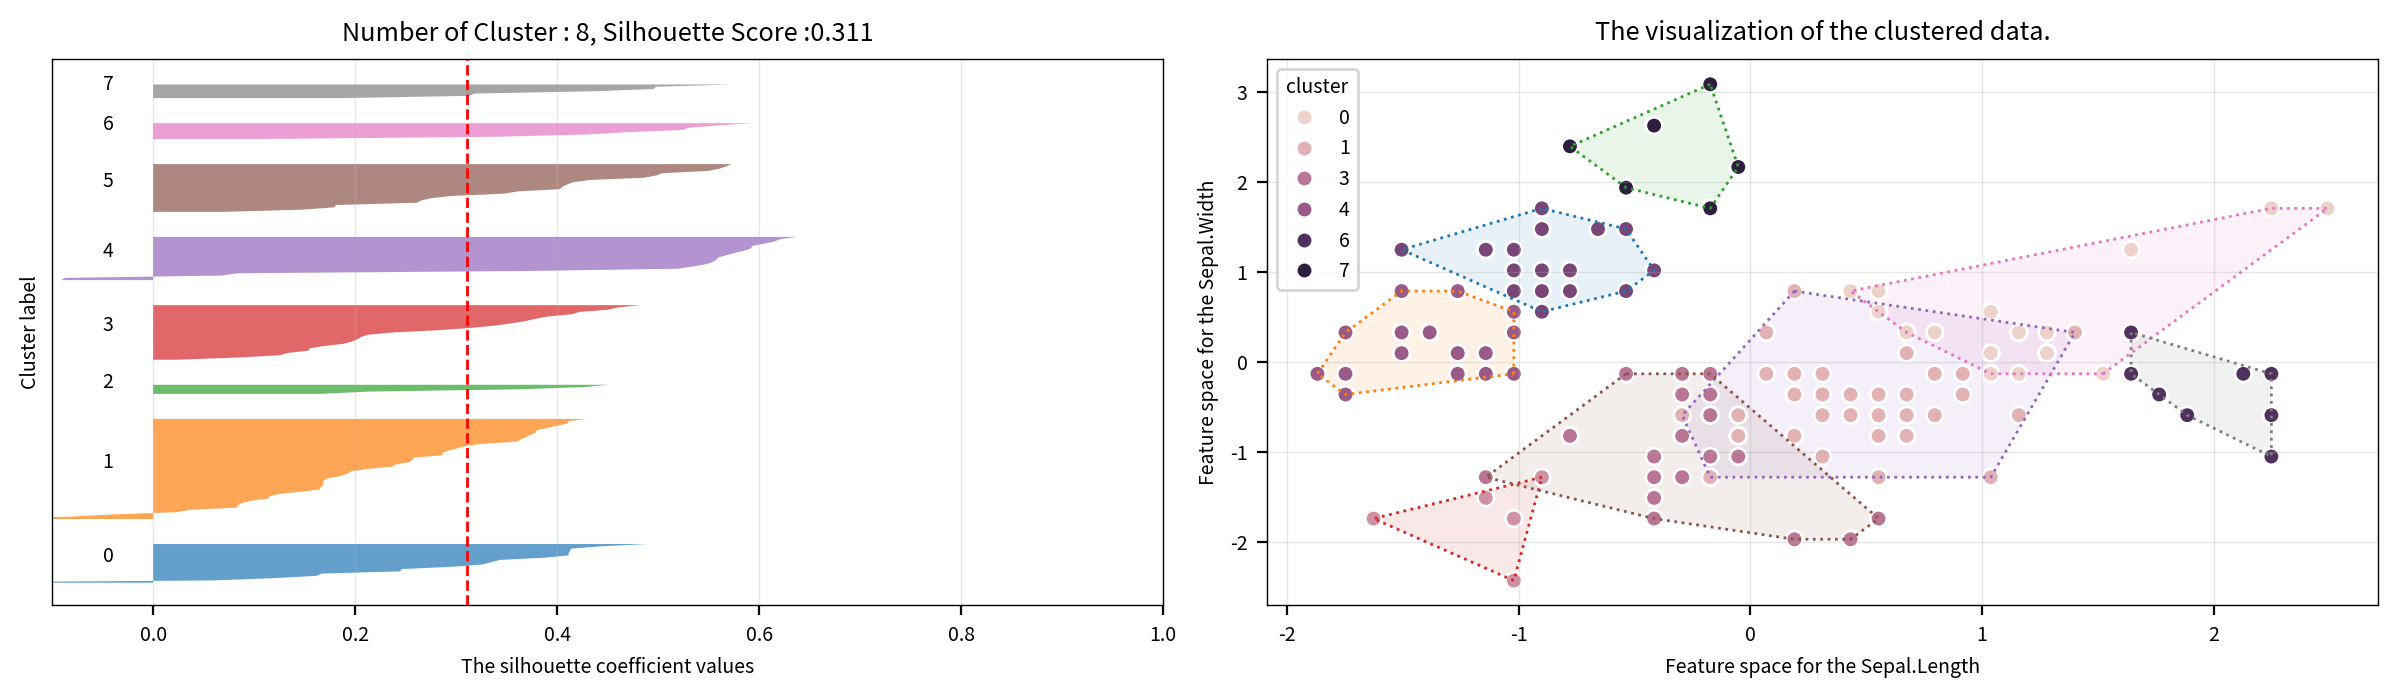

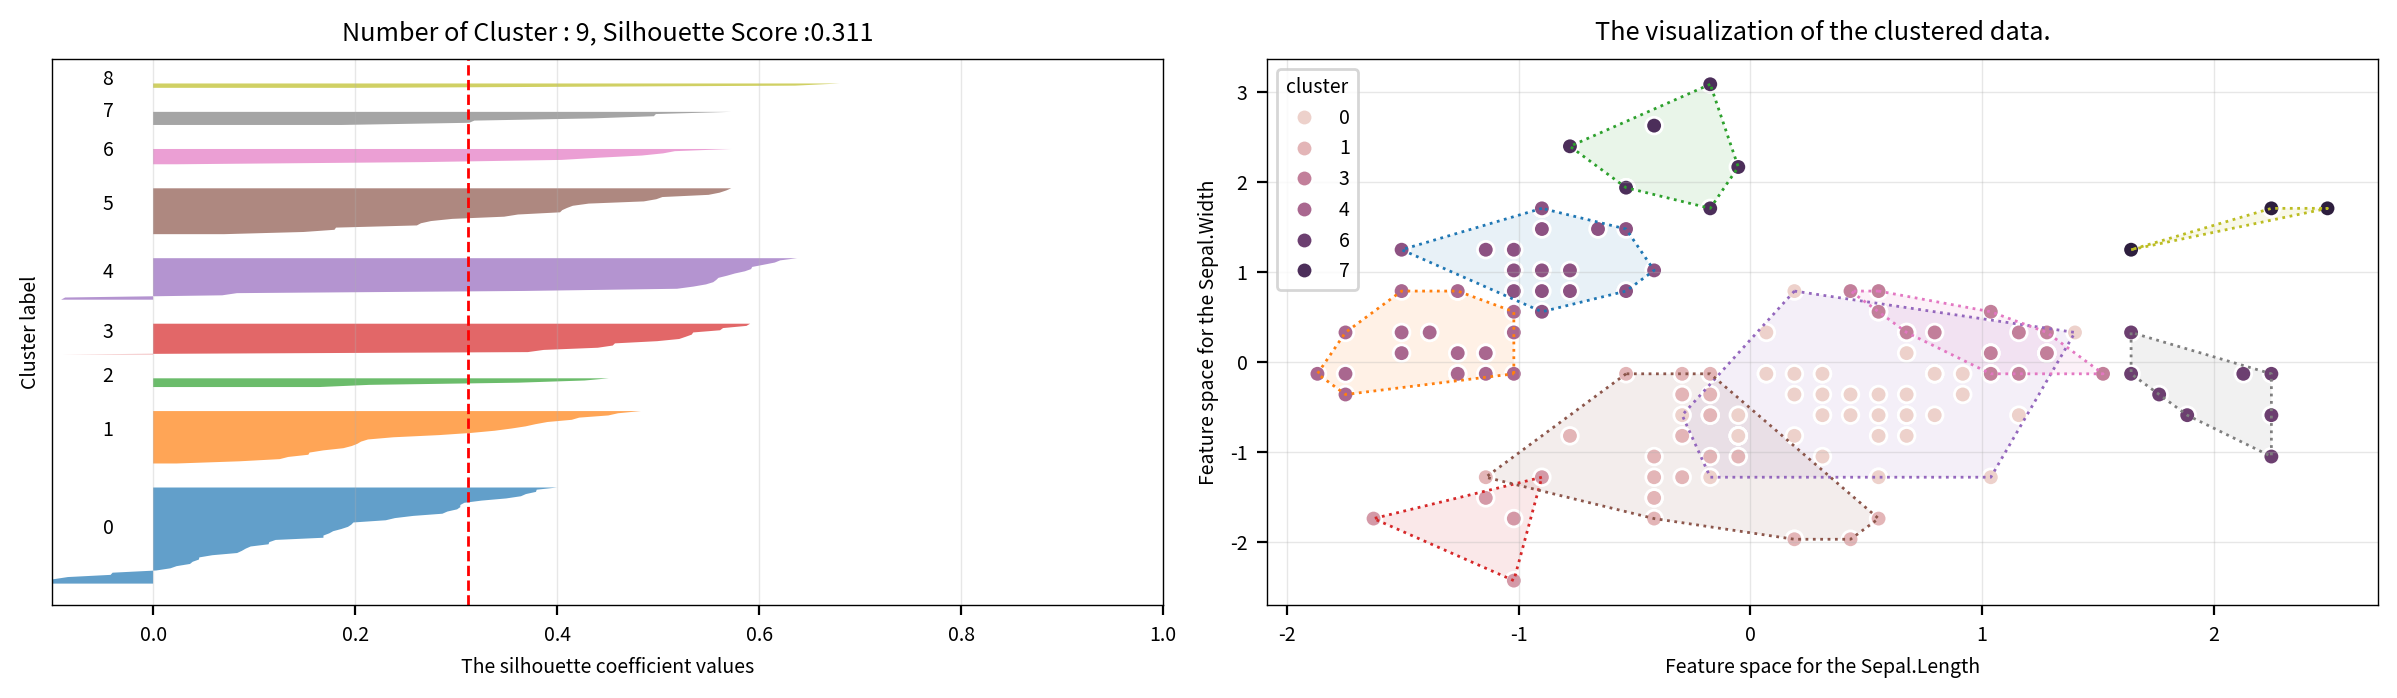

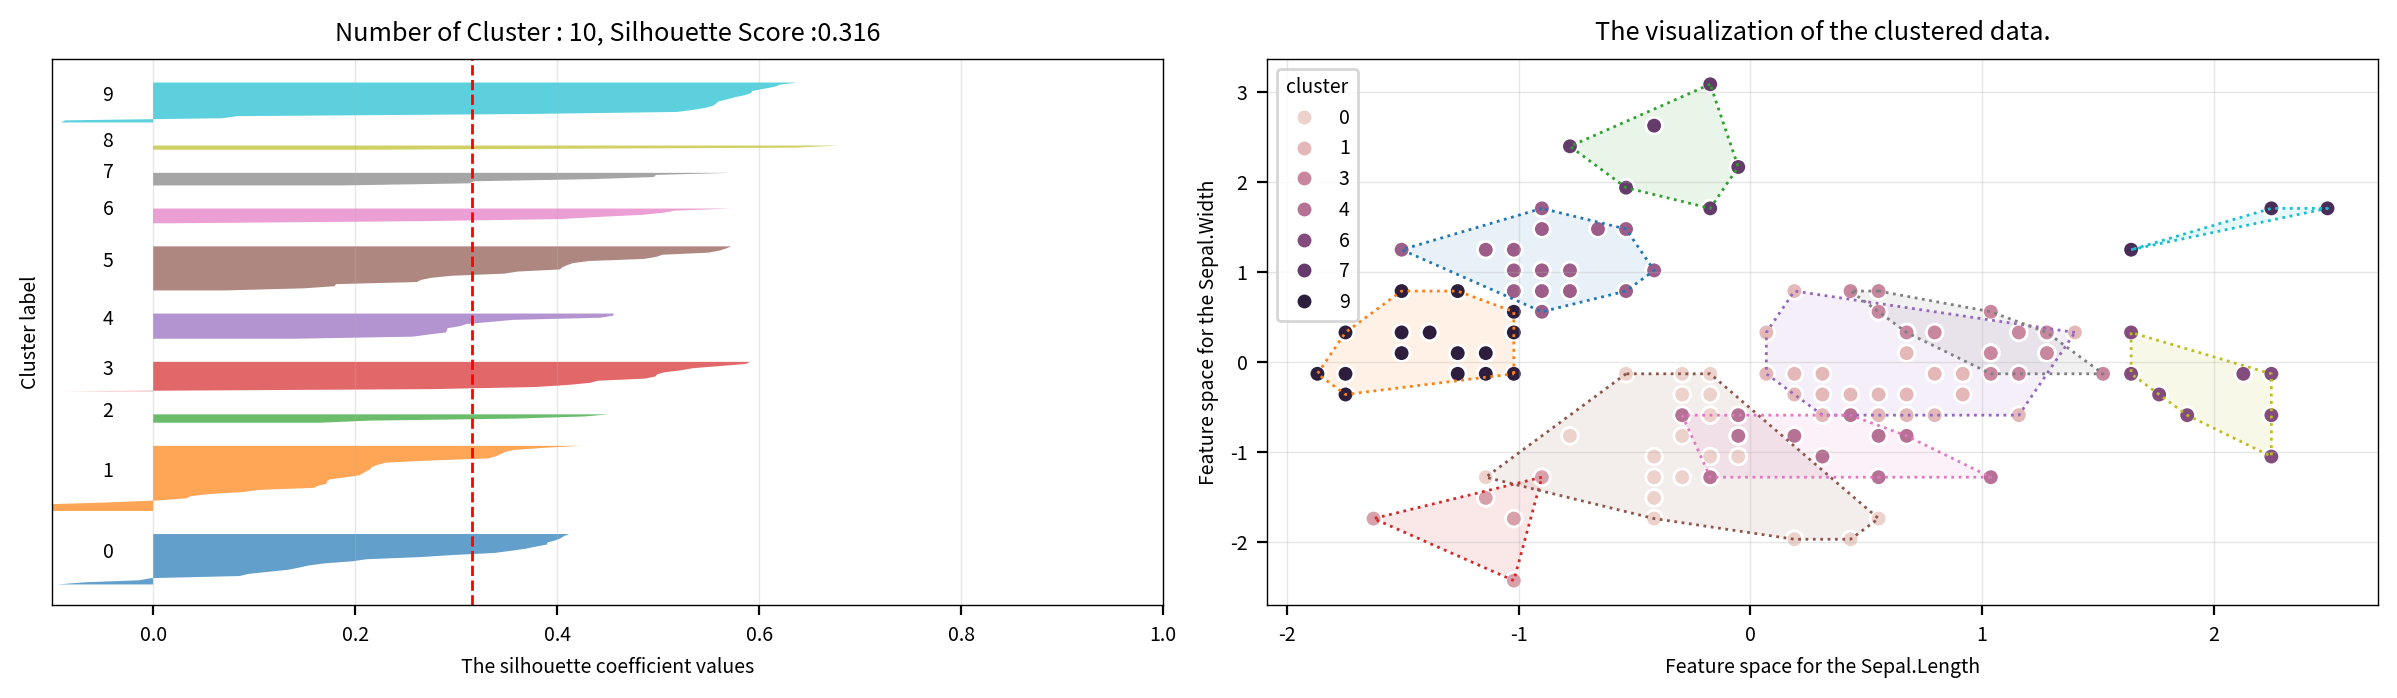

In [ ]:
klist = list(range(3,11))
s_items = []
for k in klist:
    estimator = AgglomerativeClustering(
        n_clusters=k, 
        compute_distances=True,

    )
    estimator.fit(sdf)
    cluster = estimator.labels_
    visualize_silhouette(estimator, sdf)
    s_score= silhouette_score(X=sdf, labels=cluster)

    s_items.append({"k":k, "score":s_score})

score_df = DataFrame(s_items)
score_df.sort_values(by="score", ascending=False, inplace=True)
score_df

In [ ]:
best_k=3


In [ ]:
estimator = AgglomerativeClustering(
    n_clusters=best_k,
    compute_distances=True,

)

estimator.fit(sdf)

result_df = df.copy()
result_df["cluster"] = estimator.labels_
result_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


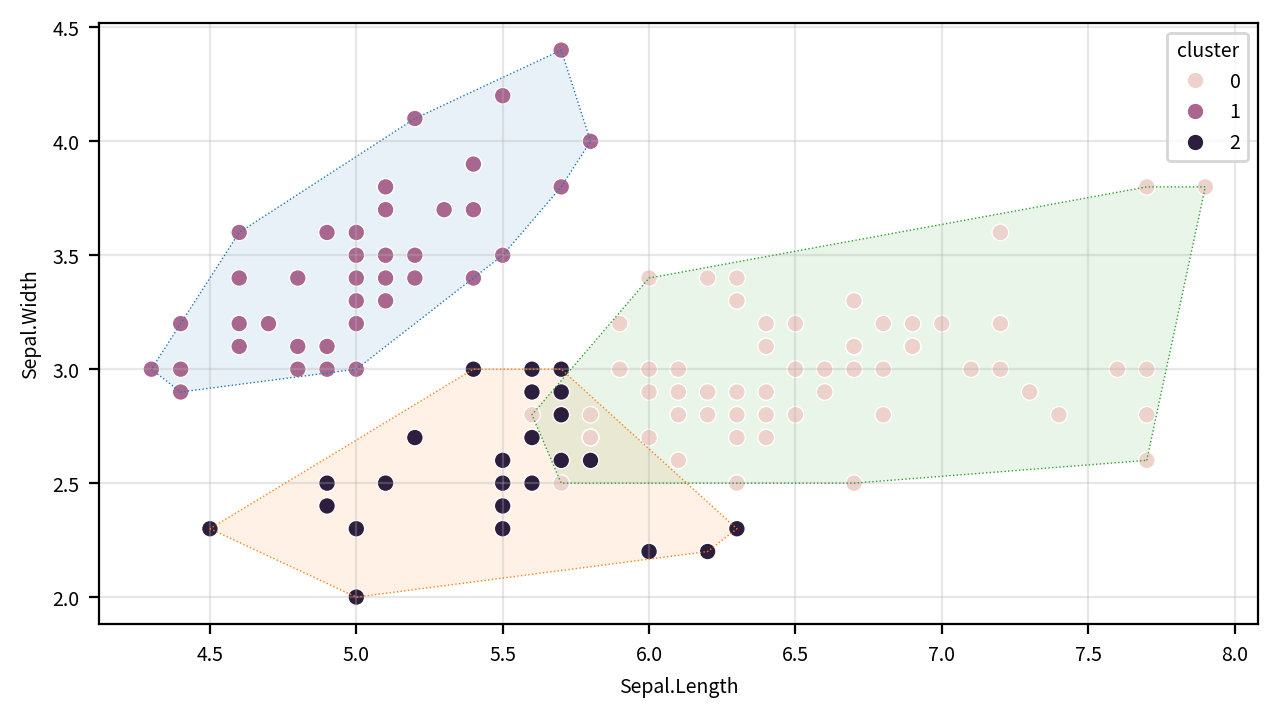

In [ ]:
vdf = result_df.copy()
hue_field = "cluster"
x_field = "Sepal.Length"
y_field = "Sepal.Width"

figsize = (1280/my_dpi, 720/my_dpi)
fig, ax = plt.subplots(1, 1, figsize=figsize, dpi=my_dpi)

for c in vdf[hue_field].unique():
    df_c = vdf.loc[vdf[hue_field] == c, [x_field, y_field]]

    try:
        hull = ConvexHull(df_c)
        points = np.append(hull.vertices, hull.vertices[0])
        ax.plot(
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth =0.5, linestyle=":"
        )
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha=0.1)

    except:
        pass

sb.scatterplot(data=vdf, x=x_field, y=y_field, hue=hue_field)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

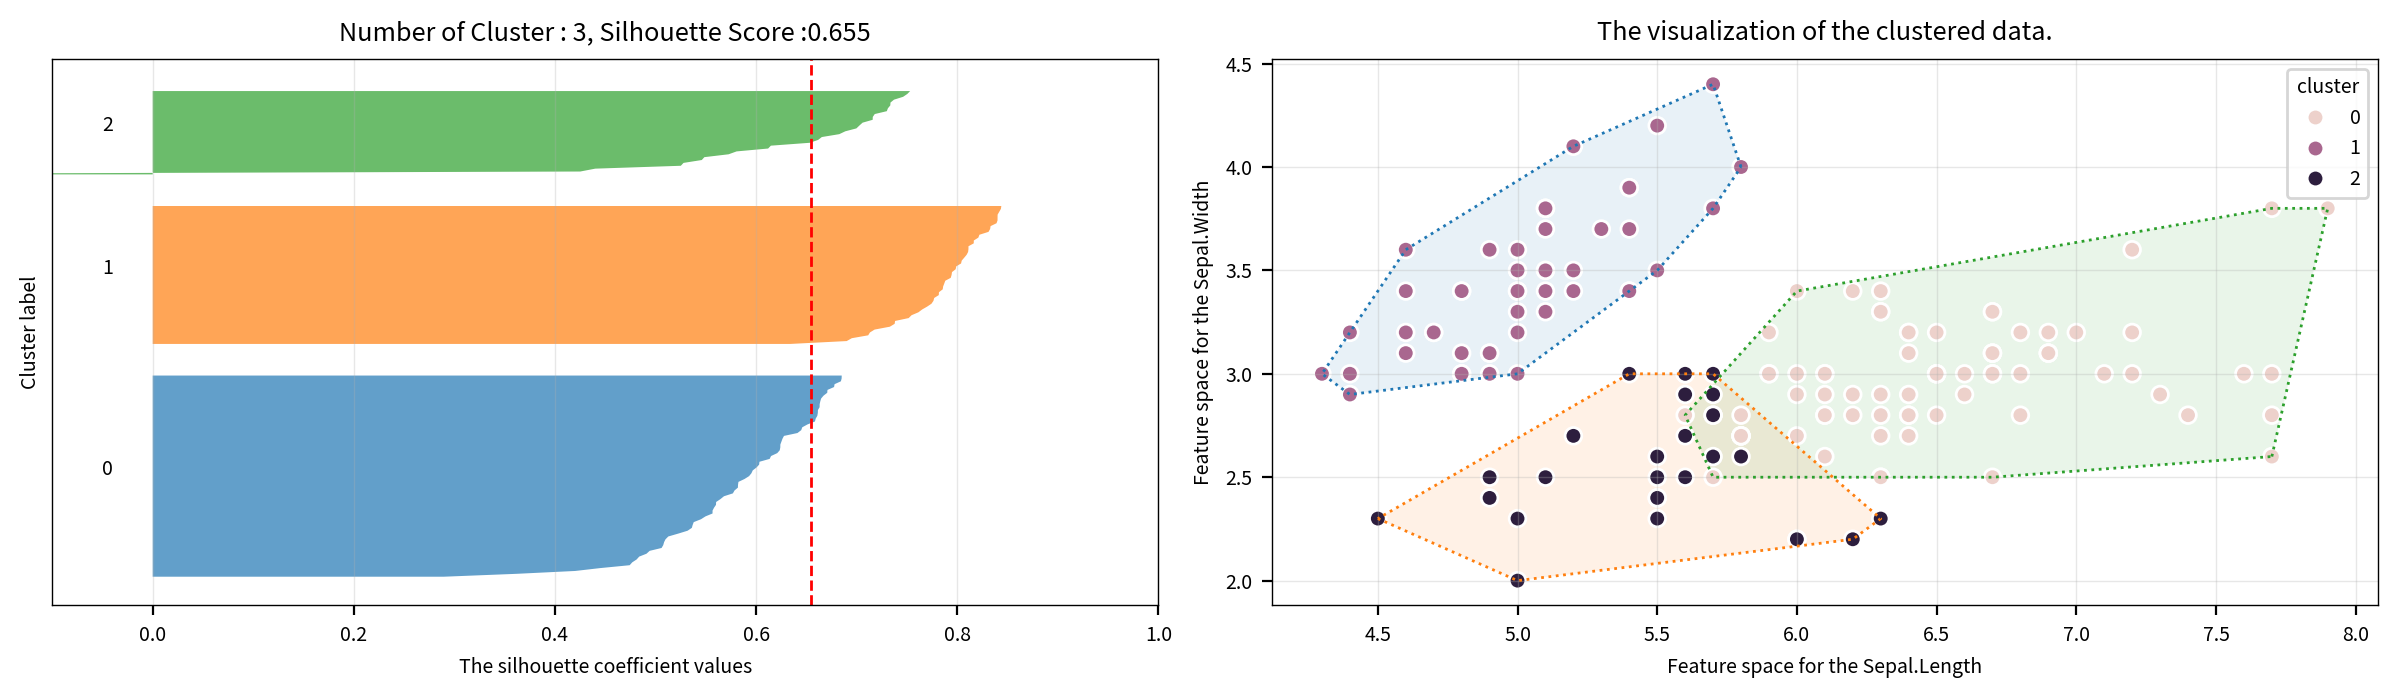

In [ ]:
visualize_silhouette(estimator=estimator, data=result_df)

In [ ]:
from dandrogram_source import dandrogram_source

ModuleNotFoundError: No module named 'dandrogram_source'

In [ ]:
data = dandrogram_source(estimator)

figsize = (1500/my_dpi, 800/my_dpi)
fig, ax = plt.subplots(1,1, figsize=figsize, dpi=my_dpi)

dendrogram(
    data,
    ax=ax,
    p=30,
    truncate_mode="lastp",
    leaf_rotation=0,
    leaf_font_size=8,
    count_sort="ascending",
)

ax.set_title("Dendrogram", fontsize=12, pad=8)
ax.grid(True, alpha=0.3)
plt.show()
plt.close()

NameError: name 'dandrogram_source' is not defined